# Using Calibrate Rotameters to Determine rTPC Flow Rate

In [1]:
import csv
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)
x=np.linspace(5.0,140.0,140)

## Read Calibration for Particular Rotameter (Argon)

In [2]:
flow=np.array([])
ball=np.array([])
with open('E602_SN2-37_Argon_SS.csv', newline='') as csvfile:
    fcsv=csv.reader(csvfile, delimiter=',')
    n=0
    for row in fcsv:
        n+=1
        if n==1: continue 
        flow=np.append(flow,float(row[0]))
        ball=np.append(ball,float(row[1]))

Interpolation: ball position vs. Argon flow rate

In [3]:
arflowSS_tube=interpolate.interp1d(ball,flow)

## Read Calibration for Typical Rotameter (Argon)

In [4]:
ro,cal=np.loadtxt('ARGON_602(E300)_SS_0_PSIG.dat',unpack=True) # sccm
arflowSS_typical=interpolate.interp1d(ro, cal)

## Plot

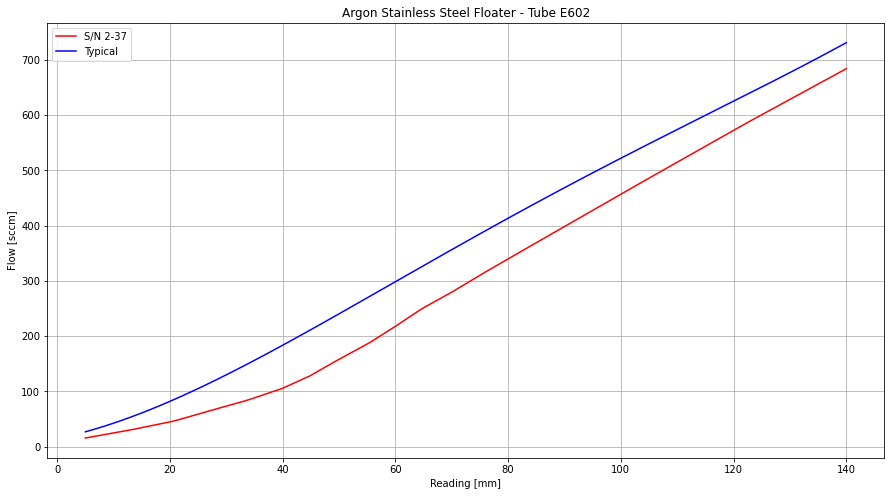

In [5]:
plt.plot(x, arflowSS_tube(x), 'r', label='S/N 2-37')
plt.plot(x, arflowSS_typical(x), 'b', label='Typical')
plt.title('Argon Stainless Steel Floater - Tube E602')
plt.xlabel('Reading [mm]')
plt.ylabel('Flow [sccm]')
plt.grid()
plt.legend(loc='upper left')
plt.show()

## Read Calibration for Particular Rotameter (Carbon Dioxide)

In [6]:
flow1=np.array([])
ball1=np.array([])
with open('E602_SN2-9_CarbonDioxide_PY.csv', newline='') as csvfile:
    fcsv=csv.reader(csvfile, delimiter=',')
    n=0
    for row in fcsv:
        n+=1
        if n==1: continue 
        flow1=np.append(flow1,float(row[0]))
        ball1=np.append(ball1,float(row[1]))
flow2=np.array([])
ball2=np.array([])
with open('E602_SN2-28_CarbonDioxide_PY.csv', newline='') as csvfile:
    fcsv=csv.reader(csvfile, delimiter=',')
    n=0
    for row in fcsv:
        n+=1
        if n==1: continue 
        flow2=np.append(flow2,float(row[0]))
        ball2=np.append(ball2,float(row[1]))

Interpolation: ball position vs. Carbon Dioxide flow rate

In [7]:
co2flowPY_tube1=interpolate.interp1d(ball1,flow1)
#print(ball1)
co2flowPY_tube2=interpolate.interp1d(ball2,flow2)
#print(ball2)

## Read Calibration for Typical Rotameter (Carbon Dioxide)

In [8]:
ro,cal=np.loadtxt('CARBON_DIOXIDE_602(E300)_GLASS_0_PSIG.dat',unpack=True) # sccm
co2flowPY_typical=interpolate.interp1d(ro, cal)

## Plot

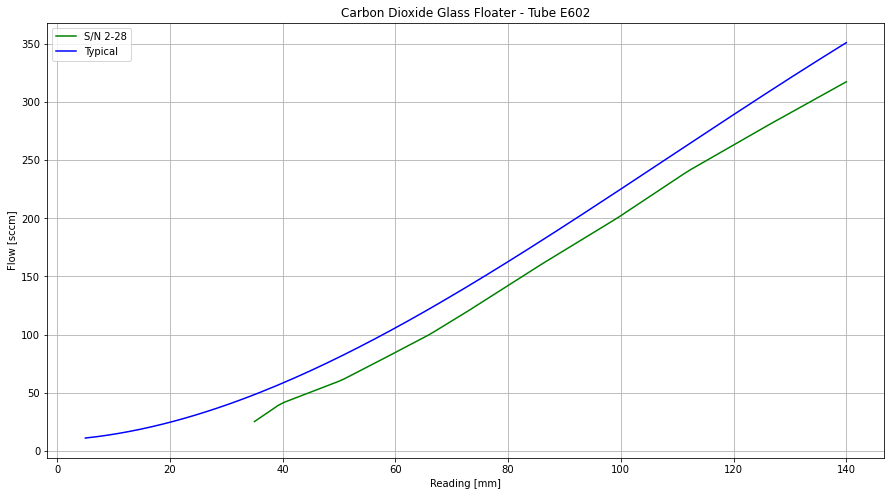

In [9]:
x1=np.linspace(5.0,130.0,130)
x2=np.linspace(35.0,140.0,100)
#plt.plot(x1, co2flowPY_tube1(x1), 'r', label='S/N 2-9')
plt.plot(x2, co2flowPY_tube2(x2), 'g', label='S/N 2-28')
plt.plot(x, co2flowPY_typical(x), 'b', label='Typical')
plt.title('Carbon Dioxide Glass Floater - Tube E602')
plt.xlabel('Reading [mm]')
plt.ylabel('Flow [sccm]')
plt.grid()
plt.legend(loc='upper left')
plt.show()

## Determination of Desired Flow Rate

### Target is 1000 cm$^{3}$/min

Reasonable maximum height of the stainless floater for the given tube for Argon.

In [10]:
ArSSball=135.0

Conversion to flow rate

In [11]:
Ar_target=arflowSS_tube(ArSSball)
print(f'Ar target {Ar_target:.0f} sccm')

Ar target 656 sccm


Calculation of the desired fraction of quencher (Carbon Dioxide)

In [12]:
qfrac=0.3
CO2_target=qfrac*Ar_target/(1.-qfrac)
print(f'CO2 target {CO2_target:.0f} sccm')

CO2 target 281 sccm


Calculation of the total flow rate

In [13]:
TotalFlow=CO2_target+Ar_target
print(f'Total Flow {TotalFlow:.0f} sccm     Quencher Fraction {CO2_target/TotalFlow*1e2:.0f}%')

Total Flow 937 sccm     Quencher Fraction 30%


Invert interpolation to determine pyrex floater position

In [14]:
co2flowPY_tube2_inv=interpolate.interp1d(flow2,ball2)
CO2PYball2=co2flowPY_tube2_inv(CO2_target)
print(f'CO2 ball reading: {CO2PYball2:.0f} mm')

CO2 ball reading: 127 mm


### Target is 500 cm$^{3}$/min

In [15]:
ArSSball=82.0
Ar_target=arflowSS_tube(ArSSball)
print(f'Ar target {Ar_target:.1f} sccm')

Ar target 351.5 sccm


In [16]:
CO2_target=qfrac*Ar_target/(1.-qfrac)
print(f'CO2 target {CO2_target:.1f} sccm')
CO2PYball2=co2flowPY_tube2_inv(CO2_target)
print(f'CO2 ball reading: {CO2PYball2:.0f} mm')

CO2 target 150.7 sccm
CO2 ball reading: 83 mm


In [17]:
TotalFlow=CO2_target+Ar_target
print(f'Total Flow {TotalFlow:.1f} sccm     Quencher Fraction {CO2_target/TotalFlow*1e2:.0f}%')

Total Flow 502.2 sccm     Quencher Fraction 30%


### Target is 300 cm$^{3}$/min

In [23]:
ArSSball=59.0
Ar_target=arflowSS_tube(ArSSball)
print(f'Ar target {Ar_target:.1f} sccm')
CO2_target=qfrac*Ar_target/(1.-qfrac)
print(f'CO2 target {CO2_target:.1f} sccm')
CO2PYball2=co2flowPY_tube2_inv(CO2_target)
print(f'CO2 ball reading: {CO2PYball2:.0f} mm')
TotalFlow=CO2_target+Ar_target
print(f'Total Flow {TotalFlow:.1f} sccm     Quencher Fraction {CO2_target/TotalFlow*1e2:.0f}%')

Ar target 211.2 sccm
CO2 target 90.5 sccm
CO2 ball reading: 62 mm
Total Flow 301.7 sccm     Quencher Fraction 30%
